In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from collections import Counter
import re

In [9]:
train_data = pd.read_csv('../Dataset/train.csv')
test_data = pd.read_csv('../Dataset/test.csv')
display(train_data.head())
display(test_data.head())

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [10]:
train_data.shape

(159571, 8)

In [11]:
# Basic dataset information
print(f"Train dataset shape: {train_data.shape}")
print(f"Test dataset shape: {test_data.shape}")

# Check for missing values
print("\nMissing values in train data:")
print(train_data.isnull().sum())

# Display basic statistics of the dataset
print("\nBasic statistics:")
train_data.describe()

Train dataset shape: (159571, 8)
Test dataset shape: (153164, 2)

Missing values in train data:
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

Basic statistics:


,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


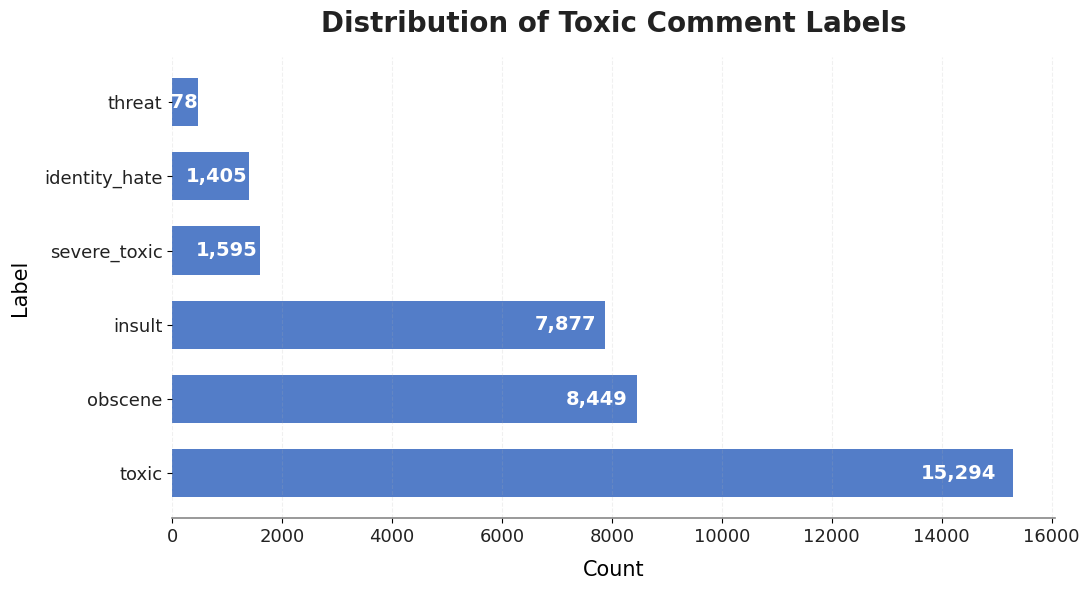

In [ ]:
plt.figure(figsize=(11, 6))
bars = plt.barh(
    label_counts.index,
    label_counts.values,
    color='#4472C4',  # Power BI blue
    edgecolor='none',
    height=0.65,
    alpha=0.92
)

# Add value annotations INSIDE each bar, with commas, bold and white
for bar in bars:
    plt.text(
        bar.get_width() * 0.98,
        bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width()):,}',
        va='center', ha='right', fontsize=14, fontweight='bold', color='white'
    )

plt.title('Distribution of Toxic Comment Labels', fontsize=20, weight='bold', color='#222222', pad=18)
plt.xlabel('Count', fontsize=15, labelpad=10)
plt.ylabel('Label', fontsize=15, labelpad=10)
plt.yticks(fontsize=13, color='#222222')
plt.xticks(fontsize=13, color='#222222')
plt.gca().spines[['top', 'right', 'left']].set_visible(False)
plt.gca().spines['bottom'].set_color('#888888')
plt.gca().spines['bottom'].set_linewidth(1.2)
plt.grid(axis='x', linestyle='--', alpha=0.18)
plt.tight_layout()

plt.show()

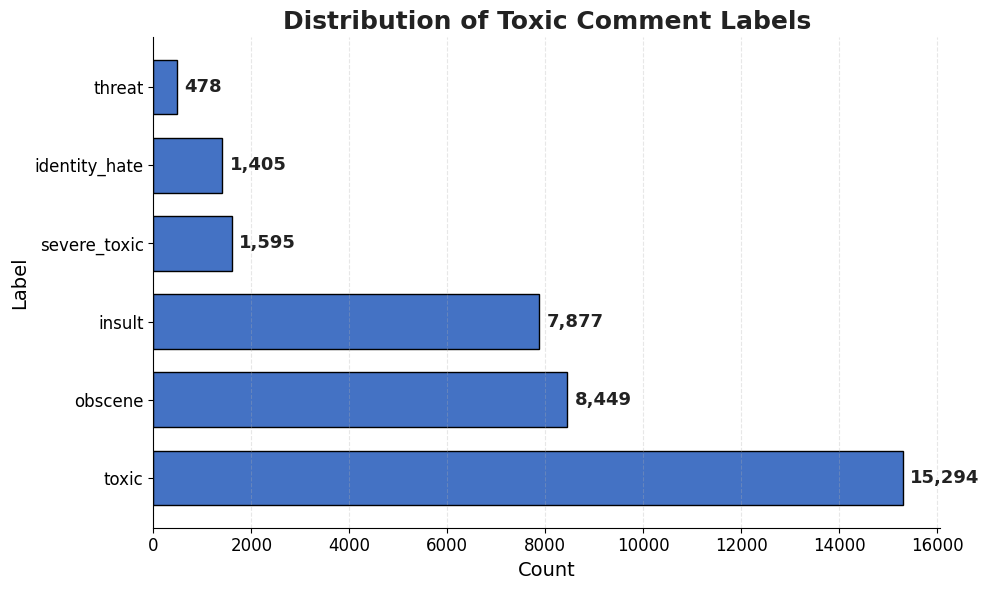

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.barh(
    label_counts.index,
    label_counts.values,
    color='#4472C4',  # Power BI blue
    edgecolor='black',
    height=0.7
)

# Add value annotations at the end of each bar, formatted with commas
for bar in bars:
    plt.text(
        bar.get_width() + max(label_counts.values) * 0.01,
        bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width()):,}',
        va='center', fontsize=13, fontweight='bold', color='#222222'
    )

plt.title('Distribution of Toxic Comment Labels', fontsize=18, weight='bold', color='#222222')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Label', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("toxic_label_distribution.png", dpi=1000, bbox_inches='tight')
plt.show()

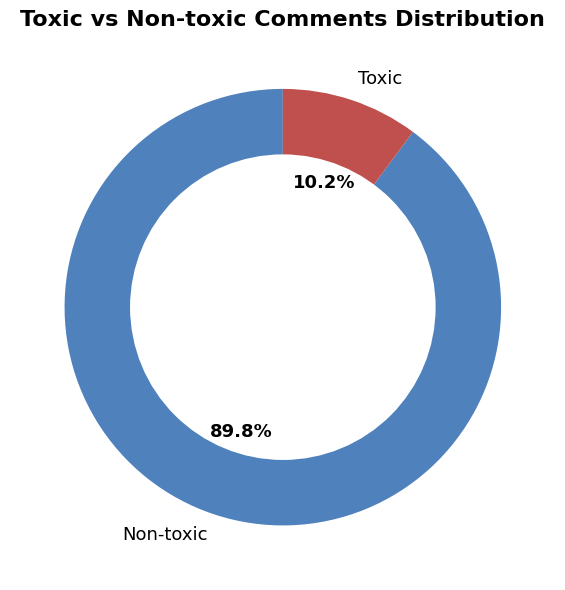

In [19]:
# Ensure num_labels exists
train_data['num_labels'] = train_data[label_columns].sum(axis=1)

labels = ['Non-toxic', 'Toxic']
sizes = [(train_data['num_labels'] == 0).sum(), (train_data['num_labels'] > 0).sum()]
colors = ['#4F81BD', '#C0504D']  # Power BI style colors

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,
    wedgeprops=dict(width=0.4), textprops=dict(color="black", fontsize=13)
)
plt.setp(autotexts, weight="bold")
plt.title('Toxic vs Non-toxic Comments Distribution', fontsize=16, weight='bold')
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white', fc='white', linewidth=0))
plt.tight_layout()
plt.show()

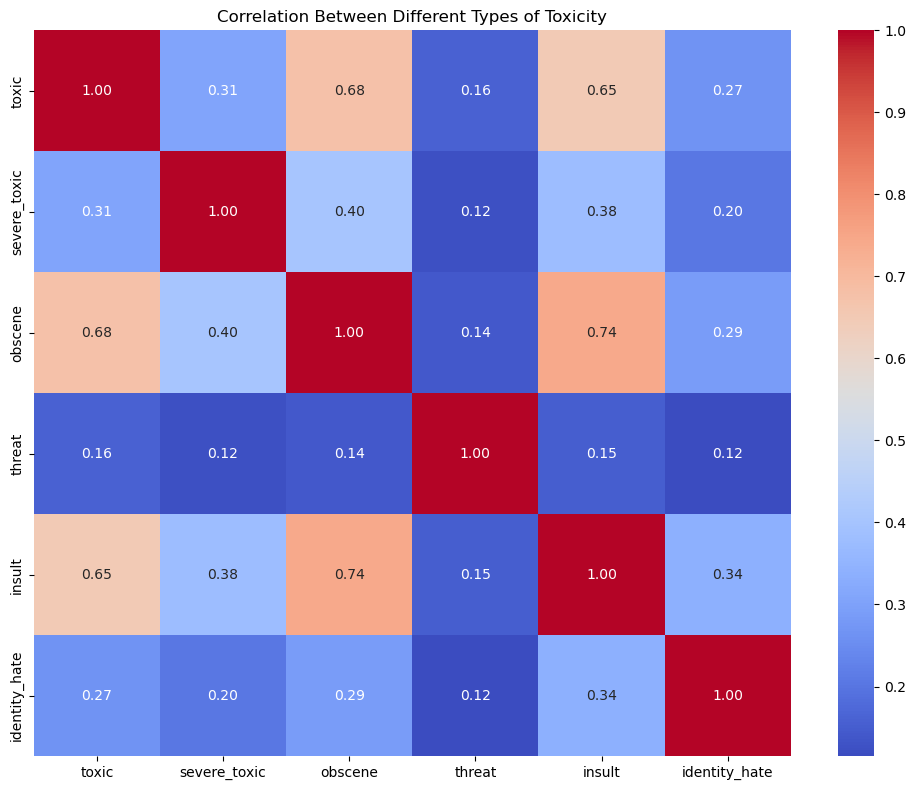

In [16]:
# Check correlation between labels
plt.figure(figsize=(10, 8))
correlation = train_data[label_columns].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Different Types of Toxicity')
plt.tight_layout()
plt.show()

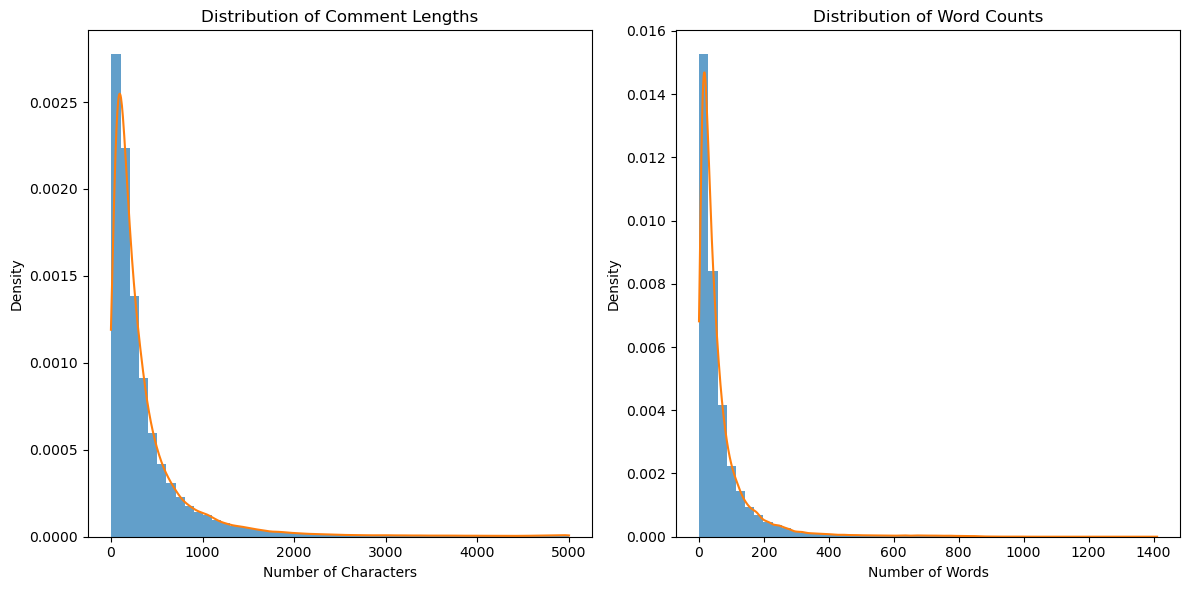

In [23]:
# Analyze comment length distribution
train_data['comment_length'] = train_data['comment_text'].apply(len)
train_data['word_count'] = train_data['comment_text'].apply(lambda x: len(x.split()))

# Plot the distribution of comment lengths
plt.figure(figsize=(12, 6))

# Left subplot - comment length
plt.subplot(1, 2, 1)
# Use matplotlib instead of seaborn histplot
plt.hist(train_data['comment_length'].values, bins=50, alpha=0.7, density=True)
# Add a kernel density estimate curve

x = np.linspace(0, train_data['comment_length'].max(), 1000)
density = stats.gaussian_kde(train_data['comment_length'].values)
plt.plot(x, density(x))
plt.title('Distribution of Comment Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Density')

# Right subplot - word count
plt.subplot(1, 2, 2)
plt.hist(train_data['word_count'].values, bins=50, alpha=0.7, density=True)
# Add a kernel density estimate curve
density = stats.gaussian_kde(train_data['word_count'].values)
x = np.linspace(0, train_data['word_count'].max(), 1000)
plt.plot(x, density(x))
plt.title('Distribution of Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

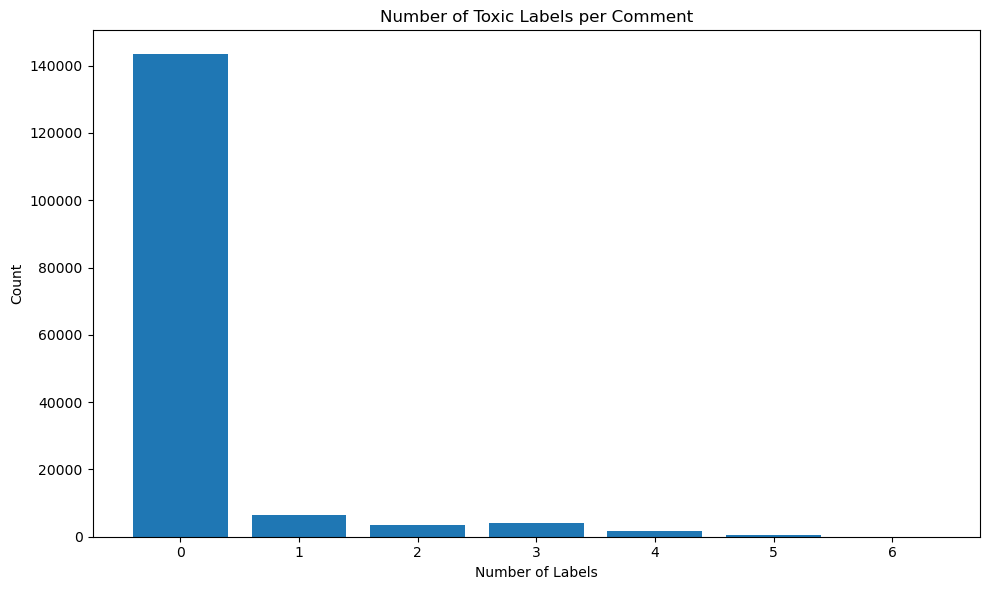


Percentage of comments with multiple toxic labels:
0 labels: 89.83%
1 labels: 3.99%
2 labels: 2.18%
3 labels: 2.64%
4 labels: 1.10%
5 labels: 0.24%
6 labels: 0.02%


In [26]:
# Multi-label analysis: check how many comments have multiple toxic labels
train_data['num_labels'] = train_data[label_columns].sum(axis=1)

plt.figure(figsize=(10, 6))
# Use matplotlib histogram/bar chart
counts = train_data['num_labels'].value_counts().sort_index()
plt.bar(counts.index, counts.values)
plt.title('Number of Toxic Labels per Comment')
plt.xlabel('Number of Labels')
plt.ylabel('Count')
plt.xticks(range(7))
plt.tight_layout()
plt.show()

# Percentage of comments with multiple labels
print("\nPercentage of comments with multiple toxic labels:")
for i in range(7):
    percentage = (train_data['num_labels'] == i).mean() * 100
    print(f"{i} labels: {percentage:.2f}%")

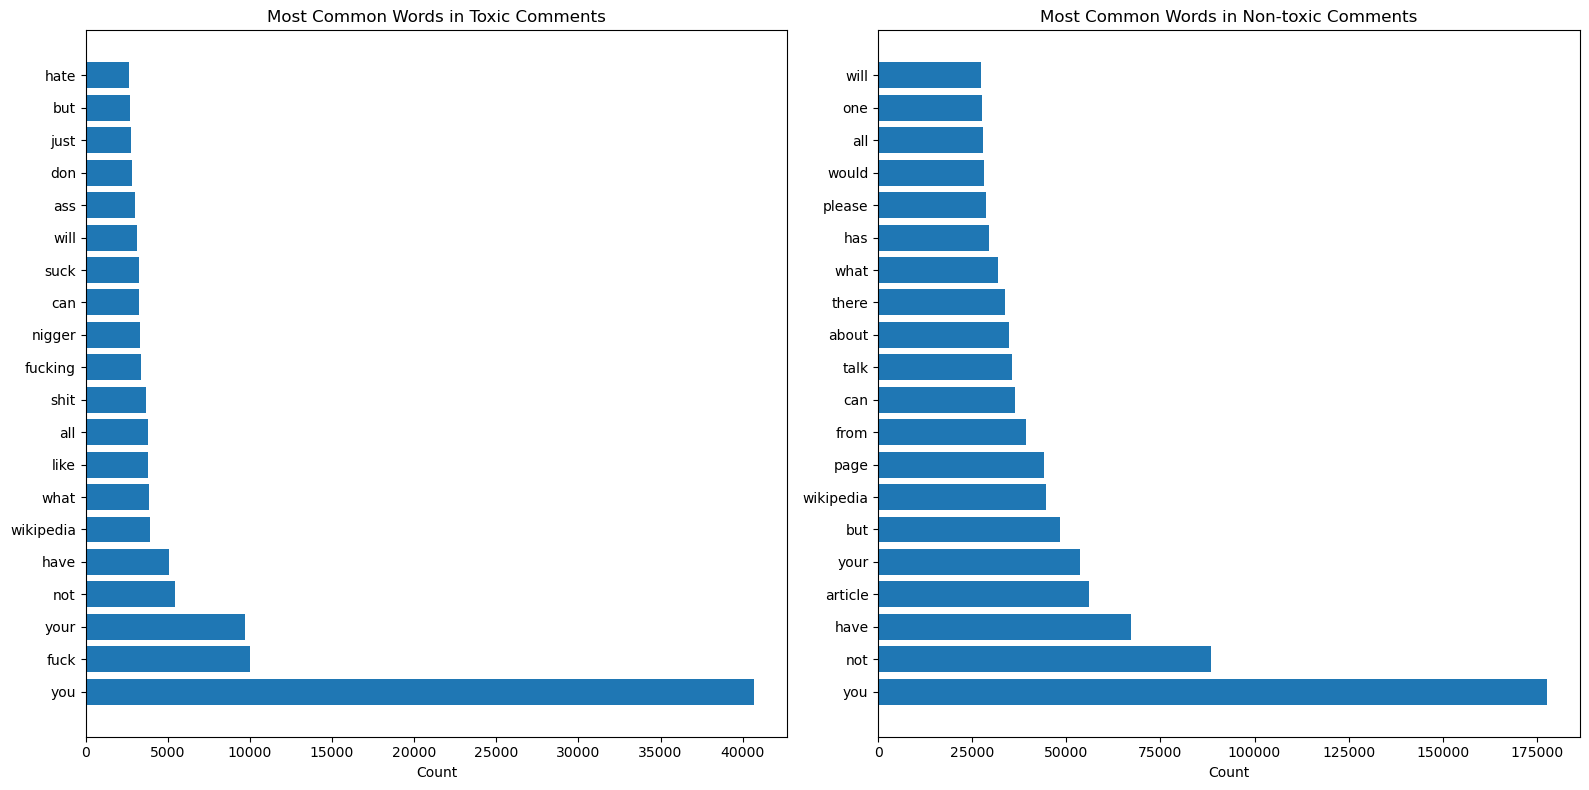

In [30]:
# Text analysis - Most common words in toxic vs non-toxic comments


def get_top_words(text_series, n=20):
    all_text = ' '.join(text_series).lower()
    # Remove punctuation and split into words
    words = re.findall(r'\b\w+\b', all_text)
    # Remove common stop words
    stop_words = {'the', 'a', 'an', 'and', 'is', 'in', 'to', 'of', 'it', 'that', 'for', 'on', 'with', 'as', 'this', 'by', 'at', 'are', 'be', 'was'}
    words = [word for word in words if word not in stop_words and len(word) > 2]
    return Counter(words).most_common(n)

# Top words in toxic comments
toxic_comments = train_data[train_data['any_toxic'] == 1]['comment_text']
non_toxic_comments = train_data[train_data['any_toxic'] == 0]['comment_text']

toxic_top_words = get_top_words(toxic_comments)
non_toxic_top_words = get_top_words(non_toxic_comments)

# Plot top words
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
words, counts = zip(*toxic_top_words)
y_pos = range(len(words))
plt.barh(y_pos, counts)
plt.yticks(y_pos, words)
plt.title('Most Common Words in Toxic Comments')
plt.xlabel('Count')

plt.subplot(1, 2, 2)
words, counts = zip(*non_toxic_top_words)
y_pos = range(len(words))
plt.barh(y_pos, counts)
plt.yticks(y_pos, words)
plt.title('Most Common Words in Non-toxic Comments')
plt.xlabel('Count')

plt.tight_layout()
plt.show()

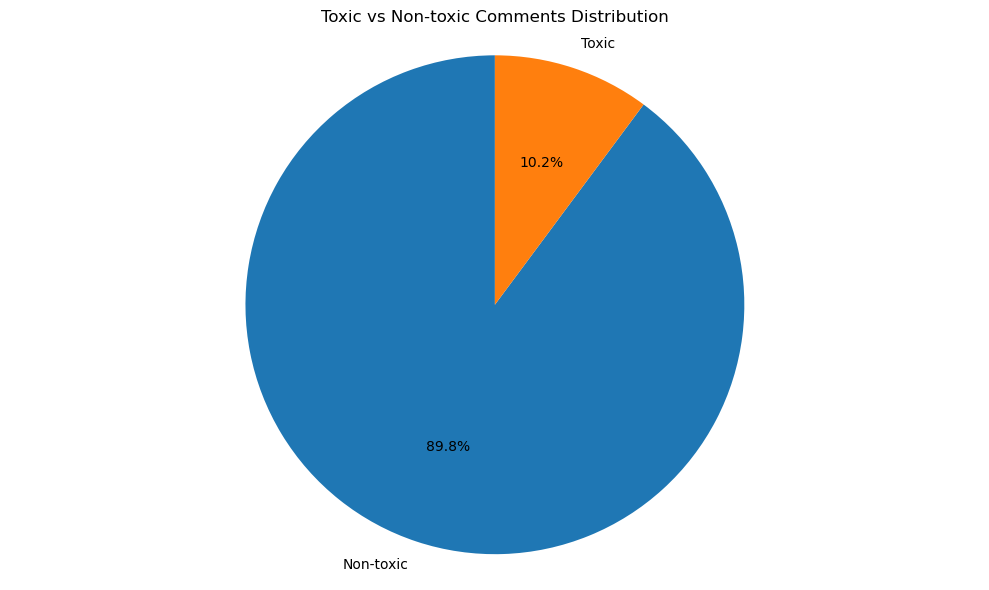

Non-toxic comments: 143346 (89.8%)
Toxic comments: 16225 (10.2%)


In [31]:
# Class imbalance analysis
plt.figure(figsize=(10, 6))
labels = ['Non-toxic', 'Toxic']
sizes = [(train_data['num_labels'] == 0).sum(), (train_data['num_labels'] > 0).sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Toxic vs Non-toxic Comments Distribution')
plt.tight_layout()
plt.show()

print(f"Non-toxic comments: {sizes[0]} ({sizes[0]/sum(sizes)*100:.1f}%)")
print(f"Toxic comments: {sizes[1]} ({sizes[1]/sum(sizes)*100:.1f}%)")